# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd
import json
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from api_keys import weather_api_key
from citipy import citipy
from datetime import datetime

In [2]:
# Output file
output_csv = 'cities.csv'

latitude_range = (-90, 90)
longitude_range = (-180, 180)



## Generate Cities List

In [3]:
lat_long = []
cities = []

# Create random latitude and longitude combinations
lat_comb = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
long_comb = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
lat_long = zip(lat_comb, long_comb)

# Get nearest city for each lat_long combination
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name

    if city not in cities:
        cities.append(city)

# City count
len(cities)


648

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_list = []

counter = 1
for city in cities:

    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    try:
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        cities_list.append(weather_json['name'])
        print(f'Processing Record {counter} - {city}')
        
    except:
        print(f'{city} not found. Skipping..')
    counter += 1
        

Processing Record 1 - severnyy
Processing Record 2 - rikitea
Processing Record 3 - yulara
Processing Record 4 - fecamp
Processing Record 5 - port alfred
Processing Record 6 - mao
Processing Record 7 - saint george
Processing Record 8 - chuy
Processing Record 9 - sola
Processing Record 10 - busselton
Processing Record 11 - bidor
Processing Record 12 - poum
Processing Record 13 - jamestown
Processing Record 14 - bandarbeyla
belushya guba not found. Skipping..
Processing Record 16 - christchurch
Processing Record 17 - albany
Processing Record 18 - hami
Processing Record 19 - ushuaia
Processing Record 20 - kapaa
Processing Record 21 - casambalangan
Processing Record 22 - cape town
Processing Record 23 - mazamitla
Processing Record 24 - vaini
Processing Record 25 - erenhot
Processing Record 26 - atuona
Processing Record 27 - zaozerne
Processing Record 28 - castro
Processing Record 29 - puerto escondido
Processing Record 30 - lae
Processing Record 31 - saskylakh
Processing Record 32 - hilo
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({
    'City' : cities_list,
    'Lat' : latitude,
    'Lng' : longitude,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date,
})

weather_df.to_csv(output_csv)

In [8]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.19,83,100,12.50,PF,1650780222
1,Kropotkin,45.4375,40.5756,58.95,64,71,11.27,RU,1650780223
2,George Town,5.4112,100.3354,89.53,70,20,10.36,MY,1650780050
3,Sisimiut,66.9395,-53.6735,27.81,96,100,5.50,GL,1650780224
4,Teluknaga,-6.0989,106.6381,94.10,70,20,4.61,ID,1650780225


In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,21.661876,15.112523,61.124232,69.666071,56.008929,7.648786,1.650780e+09
std,32.797083,88.284411,20.697593,23.154090,39.301253,5.098163,1.528529e+02
min,-54.800000,-179.166700,-9.110000,1.000000,0.000000,0.000000,1.650780e+09
25%,-4.188075,-63.638150,47.972500,60.750000,17.000000,3.760000,1.650780e+09
50%,27.502400,20.681500,64.815000,75.000000,68.000000,6.850000,1.650780e+09
75%,47.362350,84.137475,75.840000,87.000000,98.000000,10.160000,1.650781e+09
max,78.218600,179.316700,107.220000,100.000000,100.000000,24.160000,1.650781e+09


In [10]:
humid_check = weather_df.loc[weather_df['Humidity']> 100,:]
humid_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
print(datetime.today().strftime('(%d/%m/%Y)'))
date_today = datetime.today().strftime('(%d/%m/%Y)')

(24/04/2022)


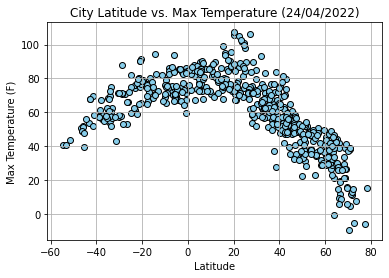

In [62]:
x_value = weather_df['Lat']
y_value = weather_df['Max Temp']

plt.scatter(x_value, y_value, marker= 'o', facecolors = 'skyblue', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f'City Latitude vs. Max Temperature {date_today}')
plt.savefig('Latitude vs. Temp.png')

Latitude vs Max Temperature: The plot shows that the temperature for cities close to the equator (0) do not experience extreme weather changes. These cities would only have wet and dry seasons.

## Latitude vs. Humidity Plot

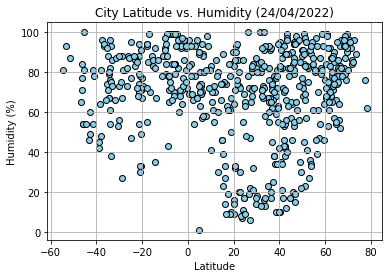

In [14]:
x_value = weather_df['Lat']
hum_value = weather_df['Humidity']

plt.scatter(x_value, hum_value, marker= 'o', facecolors = 'skyblue', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f'City Latitude vs. Humidity {date_today}');
plt.savefig('Latitude vs. Humidity.png')

Latitude vs Humidity: The plot is showing that most cities have high humidity however it seems there is no clear relationship between humidity and latitude.

## Latitude vs. Cloudiness Plot

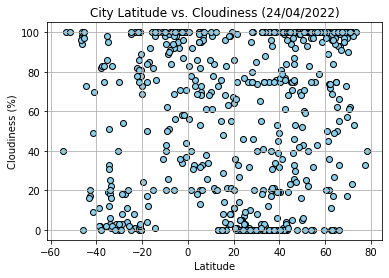

In [15]:
x_value = weather_df['Lat']
cloud_value = weather_df['Cloudiness']

plt.scatter(x_value, cloud_value, marker= 'o', facecolors = 'skyblue', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f'City Latitude vs. Cloudiness {date_today}');
plt.savefig('Latitude vs. Cloudiness.png')

Latitude vs Cloudiness: There is no relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

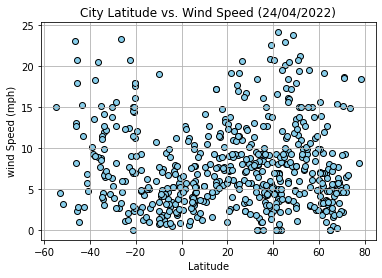

In [16]:
x_value = weather_df['Lat']
wind_value = weather_df['Wind Speed']

plt.scatter(x_value, wind_value, marker= 'o', facecolors = 'skyblue', edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('wind Speed (mph)')
plt.grid()
plt.title(f'City Latitude vs. Wind Speed {date_today}');
plt.savefig('Latitude vs. Wind Speed.png')

Latitude vs. Wind Speed: There is no clear relationship between latitude and wind speed. This plot is showing that most of the cities do not have high wind speed.

## Linear Regression

In [20]:
nh_weatherdf = weather_df.loc[(weather_df['Lat'] >= 0), ['Lat','Max Temp', 'Humidity', 'Wind Speed', 'Cloudiness']]
nh_weatherdf.head()

,Lat,Max Temp,Humidity,Wind Speed,Cloudiness
1,45.4375,58.95,64,11.27,71
2,5.4112,89.53,70,10.36,20
3,66.9395,27.81,96,5.50,100
5,17.0151,85.77,63,11.39,21
7,5.7180,76.69,73,7.78,95


In [21]:
sh_weatherdf = weather_df.loc[(weather_df['Lat'] < 0), ['Lat','Max Temp', 'Humidity', 'Wind Speed', 'Cloudiness']]
sh_weatherdf.head()

,Lat,Max Temp,Humidity,Wind Speed,Cloudiness
0,-23.1203,74.19,83,12.50,100
4,-6.0989,94.10,70,4.61,20
6,-54.8000,40.66,81,14.97,40
11,-20.2333,77.22,77,11.23,73
12,-46.1927,50.49,84,8.14,98


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
# Linear regression on temperature vs. latitude
nh_lat = nh_weatherdf['Lat']
nh_temp = nh_weatherdf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nh_lat, nh_temp)
nhregress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


The r-value is: 0.7502936910228598


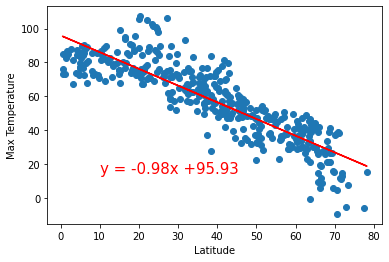

In [27]:
plt.scatter(nh_lat, nh_temp)
plt.plot(nh_lat, nhregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

Northern Hemisphere Max Temp vs Latitude: This shows that cities within the northern hemisphere that are further from the equator tend to have colder max temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
# Linear regression on temperature vs. latitude
sh_lat = sh_weatherdf['Lat']
sh_temp = sh_weatherdf['Max Temp']
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = stats.linregress(sh_lat, sh_temp)
shregress_values = sh_lat * sh_slope + sh_intercept
shline_eq = "y = " + str(round(sh_slope,2)) + "x +" + str(round(sh_intercept,2))

The r-value is: 0.49333090902109683


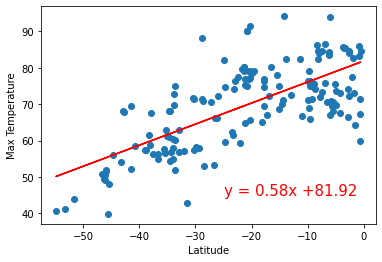

In [33]:
plt.scatter(sh_lat, sh_temp)
plt.plot(sh_lat, shregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(shline_eq,(-25,45),fontsize=15,color="red")
print(f"The r-value is: {sh_rvalue**2}")
plt.show()

Southern Hemisphere Max Temp vs Latitude: Similar to the northern hemisphere, this shows that cities going further the equator tend to have colder temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [41]:
nh_lat = nh_weatherdf['Lat']
nh_hum = nh_weatherdf['Humidity']
(nhum_slope, nhum_intercept, nhum_rvalue, nhum_pvalue, nhum_stderr) = stats.linregress(nh_lat, nh_hum)
nhumregress_values = nh_lat * nhum_slope + nhum_intercept
nhum_line_eq = "y = " + str(round(nhum_slope,2)) + "x +" + str(round(nhum_intercept,2))

The r-value is: 0.04443096013372272


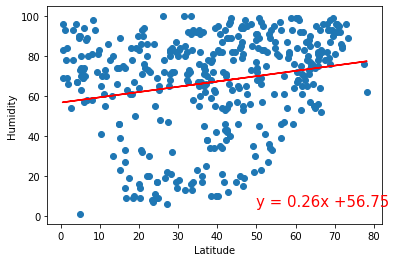

In [43]:
plt.scatter(nh_lat, nh_hum)
plt.plot(nh_lat, nhumregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(nhum_line_eq,(50,5),fontsize=15,color="red")
print(f"The r-value is: {nhum_rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [39]:
sh_lat = sh_weatherdf['Lat']
sh_hum = sh_weatherdf['Humidity']
(shum_slope, shum_intercept, shum_rvalue, shum_pvalue, shum_stderr) = stats.linregress(sh_lat, sh_hum)
shumregress_values = sh_lat * shum_slope + shum_intercept
shumline_eq = "y = " + str(round(shum_slope,2)) + "x +" + str(round(shum_intercept,2))

The r-value is: 0.059452192831836295


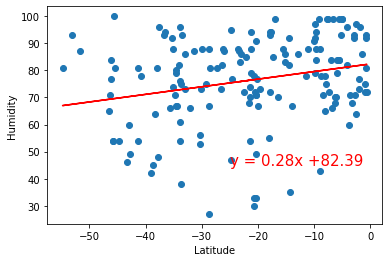

In [40]:
plt.scatter(sh_lat, sh_hum)
plt.plot(sh_lat, shumregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(shumline_eq,(-25,45),fontsize=15,color="red")
print(f"The r-value is: {shum_rvalue**2}")
plt.show()

Northern and Southern Hemisphere Latitude vs Humidity: Both graphs show a slightly positive relationship however our r-value shows that it will be difficult to predict humidity based on latitude as there is no clear relationship between the variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [46]:
nh_lat = nh_weatherdf['Lat']
nh_cld = nh_weatherdf['Cloudiness']
(nhcld_slope, nhcld_intercept, nhcld_rvalue, nhcld_pvalue, nhcld_stderr) = stats.linregress(nh_lat, nh_cld)
nhcldregress_values = nh_lat * nhcld_slope + nhcld_intercept
nhcld_line_eq = "y = " + str(round(nhcld_slope,2)) + "x +" + str(round(nhcld_intercept,2))

The r-value is: 0.06790637115507053


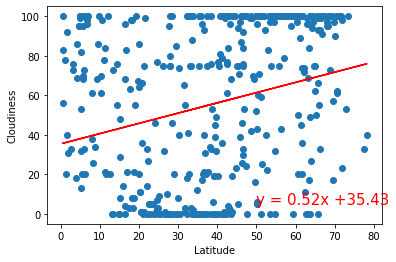

In [47]:
plt.scatter(nh_lat, nh_cld)
plt.plot(nh_lat, nhcldregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(nhcld_line_eq,(50,5),fontsize=15,color="red")
print(f"The r-value is: {nhcld_rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [48]:
sh_lat = sh_weatherdf['Lat']
sh_cld = sh_weatherdf['Cloudiness']
(shcld_slope, shcld_intercept, shcld_rvalue, shcld_pvalue, shcld_stderr) = stats.linregress(sh_lat, sh_cld)
shcldregress_values = sh_lat * shcld_slope + shcld_intercept
shcld_line_eq = "y = " + str(round(shcld_slope,2)) + "x +" + str(round(shcld_intercept,2))

The r-value is: 0.10207359004413932


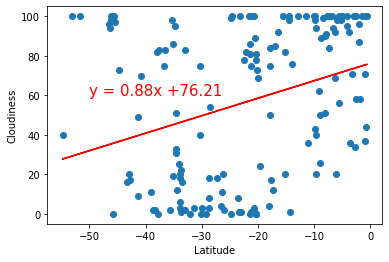

In [51]:
plt.scatter(sh_lat, sh_cld)
plt.plot(sh_lat, shcldregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(shcld_line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-value is: {shcld_rvalue**2}")
plt.show()

Northern and Southern Hemisphere Latitude vs Cloudiness: The graphs show that there is a slightly positive relationship between latitude and cloudiness.
For countries in the southern hemisphere, the further cities are from the equator the less cloudiness they experience. While those in the northern hemisphere experience the opposite, cities further from the equator experience more cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [52]:
nh_lat = nh_weatherdf['Lat']
nh_wind = nh_weatherdf['Wind Speed']
(nhwin_slope, nhwin_intercept, nhwin_rvalue, nhwin_pvalue, nhwin_stderr) = stats.linregress(nh_lat, nh_wind)
nhwindregress_values = nh_lat * nhwin_slope + nhwin_intercept
nhwin_line_eq = "y = " + str(round(nhwin_slope,2)) + "x +" + str(round(nhwin_intercept,2))

The r-value is: 0.0006083031742260508


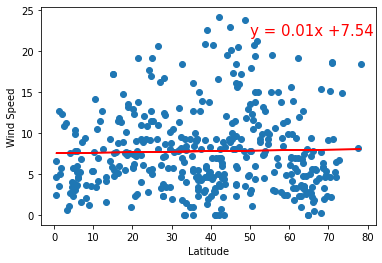

In [57]:
plt.scatter(nh_lat, nh_wind)
plt.plot(nh_lat, nhwindregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(nhwin_line_eq,(50,22),fontsize=15,color="red")
print(f"The r-value is: {nhwin_rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [58]:
sh_lat = sh_weatherdf['Lat']
sh_wind = sh_weatherdf['Wind Speed']
(shwin_slope, shwin_intercept, shwin_rvalue, shwin_pvalue, shwin_stderr) = stats.linregress(sh_lat, sh_wind)
shwindregress_values = sh_lat * shwin_slope + shwin_intercept
shwin_line_eq = "y = " + str(round(shwin_slope,2)) + "x +" + str(round(shwin_intercept,2))

The r-value is: 0.15482480396889808


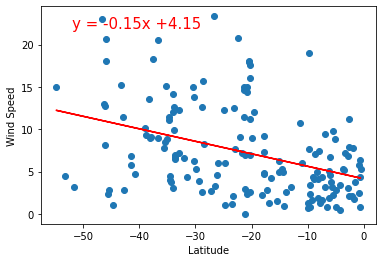

In [61]:
plt.scatter(sh_lat, sh_wind)
plt.plot(sh_lat, shwindregress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(shwin_line_eq,(-52,22),fontsize=15,color="red")
print(f"The r-value is: {shwin_rvalue**2}")
plt.show()

Northern and Southern Hemisphere Latitude vs Wind Speed: 
There is no relationship between latitude and wind speed for cities in the northern hemisphere. However there is a slightly negative relationship between the two variables for cities within the southern hemisphere which shows that cities further the equator tends to experience higher wind speed.